In [1]:
!pip install tensorflow
!pip install keras

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [5]:
# unzip dataset
from zipfile import ZipFile

data_path = '/content/dataset.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [6]:
path = '/content/dog-vs-cat'
classes = os.listdir(path)
classes

['cat', 'dog']

In [9]:
# show dataset
base_dir = '/content/dog-vs-cat'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [20]:
# Model Architecture
# 4 Convolutional layers - Max Pooling Layers - Relu Activation - Flatten - Dense/Fully Connected - Batch Normalization - Dropout - Sigmoid Activation

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

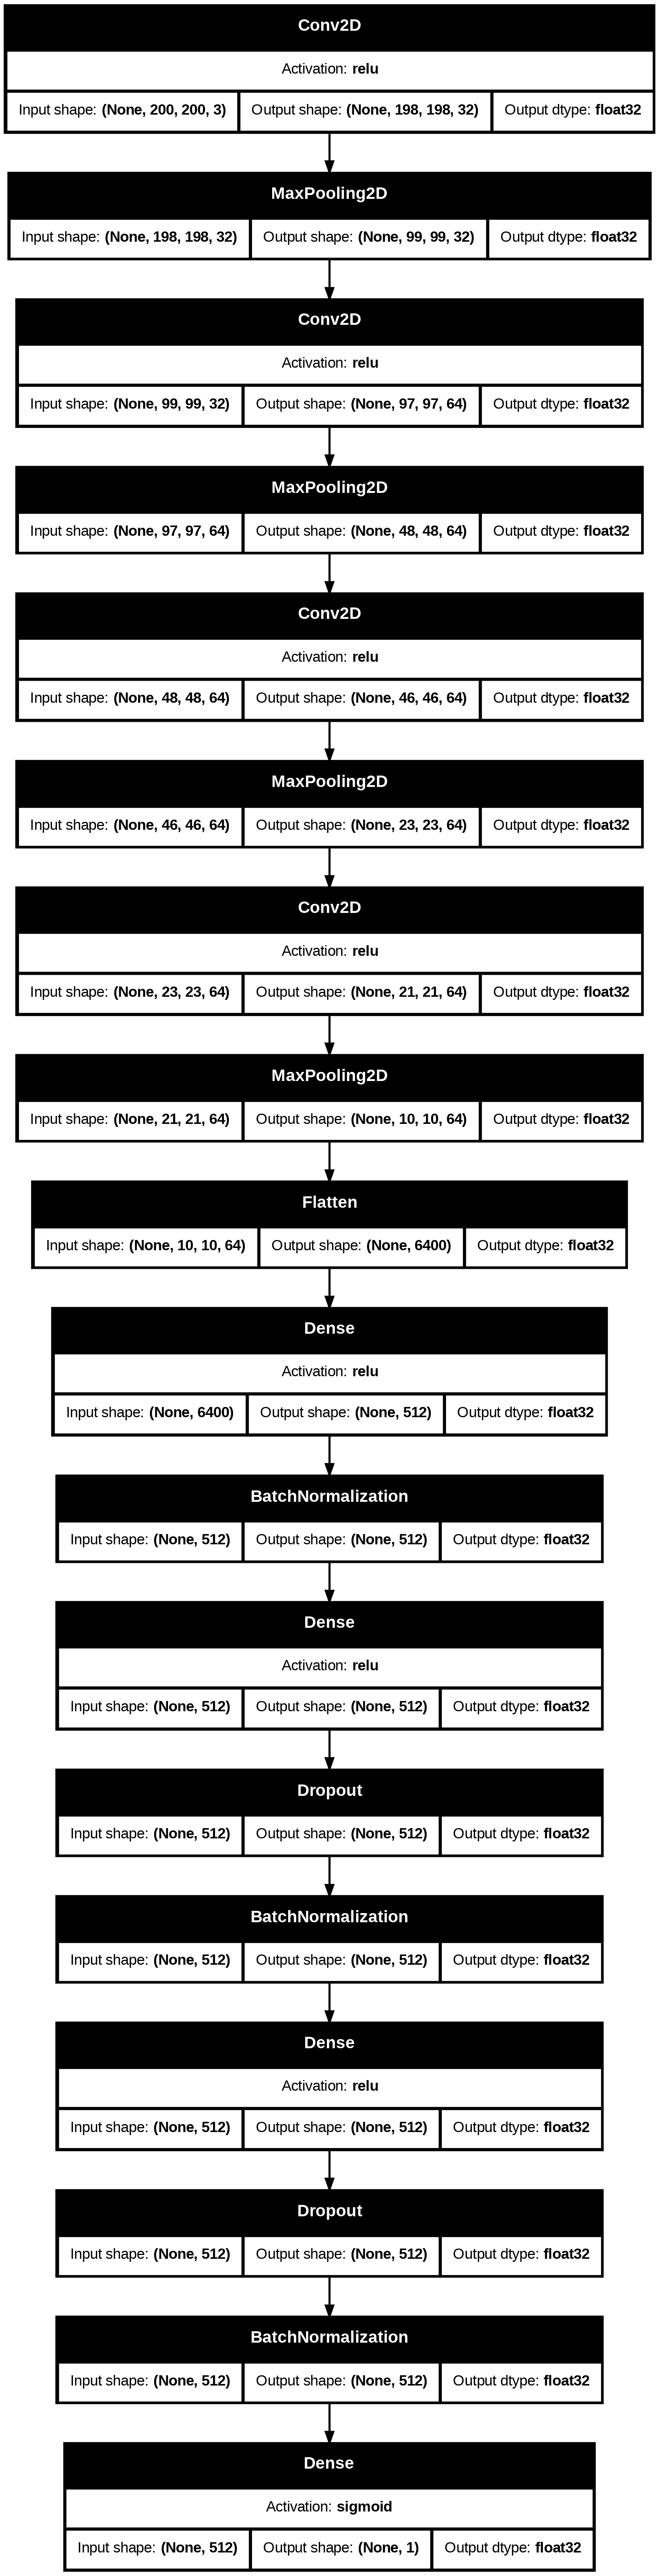

In [12]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [15]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
# Model Training
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1899s 3s/step - accuracy: 0.5561 - loss: 0.7806 - val_accuracy: 0.5364 - val_loss: 0.8509
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1948s 3s/step - accuracy: 0.6540 - loss: 0.6301 - val_accuracy: 0.7412 - val_loss: 0.5440
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1918s 3s/step - accuracy: 0.7492 - loss: 0.5194 - val_accuracy: 0.5224 - val_loss: 0.9256
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1837s 3s/step - accuracy: 0.7431 - loss: 0.5233 - val_accuracy: 0.7668 - val_loss: 0.5745
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1898s 3s/step - accuracy: 0.7890 - loss: 0.4491 - val_accuracy: 0.5176 - val_loss: 0.9781
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1867s 3s/step - accuracy: 0.7080 - loss: 0.5718 - val_accuracy: 0.6000 - val_loss: 1.0501
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1887s 3s/step - accuracy: 0.7846 - loss: 0.4644 - val_accuracy: 0.4924 - val_loss: 1.3652
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 1897s 3s/step - accuracy: 0.7048 - loss: 0.5718 - 

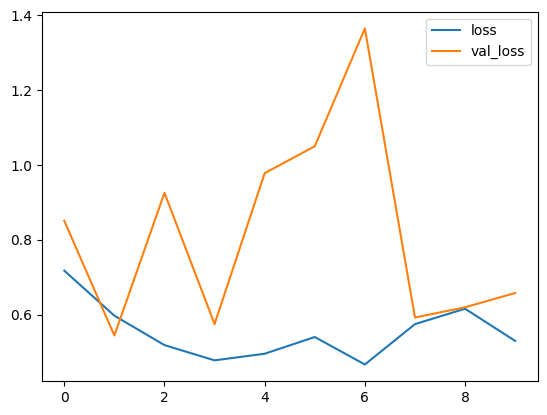

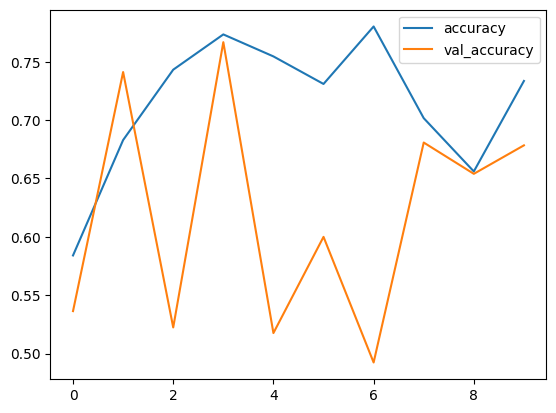

In [16]:
# Model Evaluation
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Dog


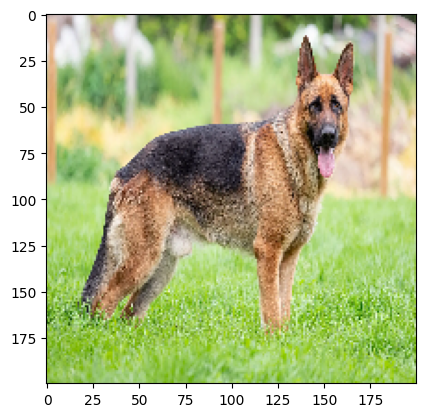

In [17]:
from keras.preprocessing import image

# Input image
test_image = image.load_img('/content/1.jpg',target_size=(200,200))

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

# Result
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Cat


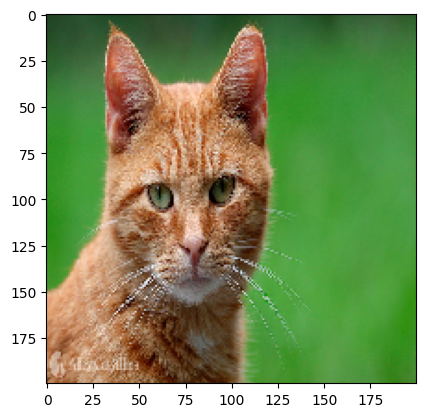

In [19]:
# Input image
test_image = image.load_img('/content/2.jpg', target_size=(200, 200))

plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)

# Result
i = 0
if(result >= 0.5):
    print("Dog")
else:
    print("Cat")